This script recorded the pipeline to simulate drift conditions under the study 'mouse_VISp_L5_128ch'.

Following recordings were generated:
- recording_toy
- recording_onlydrift_slow
- recording_onlydrift_fast

In [1]:
from utils import *
from simulate.simulate import *
from compare.compare import *

import numpy as np
import pickle as pkl
import shutil

import MEArec as mr
import MEAutility as mu

In [2]:
# path to study
study_name = 'mouse_VISp_L5_128ch'
study_dir = './studies'
study_path = Path(study_dir) / study_name

In [3]:
# path to templates
template_path = study_path / 'templates' /'template_drift'

In [9]:
###### rec_params for recording_toy

# get default
rec_params = mr.get_default_recordings_params()

rec_params['cell_types'] = {'excitatory': ['spiny','sparsely_spiny'], 'inhibitory': ['aspiny']}

rec_params['spiketrains']['n_exc'] = 40 # int, number of excitatory cells, less than number of templates
rec_params['spiketrains']['n_inh'] = 20 # int, number of inhibitory cells
rec_params['spiketrains']['f_exc'] = 5 # float, average firing rate of exc cells (Hz)
rec_params['spiketrains']['f_inh'] = 15 # float, average firing rate of inh cells (Hz)
rec_params['spiketrains']['st_exc'] = 1 # float, firing rate standard deviation of exc cells
rec_params['spiketrains']['st_inh'] = 3 # float, firing rate standard deviation of inh cells
rec_params['spiketrains']['min_rate'] = 0.5 # float, min firing rate (Hz)
rec_params['spiketrains']['ref_per'] = 2 # float, refractory period (msec)
rec_params['spiketrains']['process'] = 'poisson' # process of spike train simulation, ['poisson','gamma']
rec_params['spiketrains']['gamma_shape'] = 2 # gamma shape for gamma process
rec_params['spiketrains']['duration'] = 30 # float, recording time

rec_params['templates']['min_dist'] = 25 # float, min distance between cells
rec_params['templates']['min_amp'] = 50 # float, min spike amplitude (uV)
rec_params['templates']['max_amp'] = 500 # float, max spike amplitude (uV)
rec_params['templates']['xlim'] = None # limits of neurons in x-axis
rec_params['templates']['ylim'] = None # limits of neurons in y-axis
rec_params['templates']['zlim'] = None # limits of neurons in z-axis
rec_params['templates']['overlap_threshold'] = 0.9 # float, threshold to consider 2 templates spatially overlapping
rec_params['templates']['n_jitters'] = 10 # int, number of temporal jittered copies for each template (temporal shift within one sampling period)
rec_params['templates']['upsample'] = 8 # int, upsampling factor to extract jittered copies
rec_params['templates']['pad_len'] = [3,3] # float, pre/post time padding of templates (msec)

rec_params['recordings']['fs'] = None # if None, computed from templates
rec_params['recordings']['dtype'] = 'float32'
rec_params['recordings']['overlap'] = True # compute temporal and spatial overlap for each spike
rec_params['recordings']['extract_waveforms'] = True # extract waveforms from recordings
rec_params['recordings']['sync_rate'] = 0.05 # sync rate 0-1 for spatially overlapping templates
rec_params['recordings']['sync_jitt'] = 1 # float, jitter for added sync spikes (msec)
rec_params['recordings']['modulation'] = 'none' # type of spike modulation ['none','template','electrode'] 'template': same value on each electrode; 'electrode': different value on each electrode
rec_params['recordings']['sdrand'] = 0.05 # float, standard deviation of Guassian modulation, when bursting is False

rec_params['recordings']['bursting'] = True # modulate spikes in amplitude depending on ISI
rec_params['recordings']['exp_decay'] = 0.1 # float, when bursting is True, decay in amplitude between consecutive spikes
rec_params['recordings']['n_burst_spikes'] = 10 # int, max bursting consecutive spikes
rec_params['recordings']['max_burst_duration'] = 100 # float, max burst modulation time (msec)
rec_params['recordings']['shape_mod'] = True # stretch spike shapes with sigmoid transform
rec_params['recordings']['shape_stretch'] = 30 # float, amount of stretch for shape modulation
rec_params['recordings']['n_bursting'] = None # int, number of bursting cells, if None, all are bursting
rec_params['recordings']['chunk_duration'] = 20 # sec, processing chunk

rec_params['recordings']['noise_mode'] = 'distance-correlated' # ['uncorrelated','distance-correlated','far-neurons']
rec_params['recordings']['noise_level'] = 10 # float, noise standard deviation (uV)
rec_params['recordings']['noise_color'] = True # have colored noise
rec_params['recordings']['noise_half_distance'] = 30 # distance (um) between electrodes for which correlation is 0.5
rec_params['recordings']['color_peak'] = 300 # peak/cutoff frequency for colored noise (Hz)
rec_params['recordings']['color_q'] = 2 # quality factor for colored noise
rec_params['recordings']['color_noise_floor'] = 0.5 # percent of addictive noise for colored noise
rec_params['recordings']['far_neurons_n'] = 300 # number of far neurons to be simulated
rec_params['recordings']['far_neurons_max_amp'] = 10 # max amplitude of far neurons
rec_params['recordings']['far_neurons_noise_floor'] = 0.5 # percent of addictive noise for far-neurons noise
rec_params['recordings']['far_neurons_exc_inh_ratio'] = 0.8 # e/i noisy neuron ratio 0-1

rec_params['recordings']['filter'] = False # filter the recording
rec_params['recordings']['filter_cutoff'] = [300,6000]
rec_params['recordings']['filter_order'] = 3

rec_params['recordings']['drifting'] = True # simulate drifting recordings
rec_params['recordings']['n_drifting'] = 0 # number of drifting cells, if None, all are drifting
rec_params['recordings']['perferred_dir'] = [0,0,1] # drifting direction, positive z-axis
rec_params['recordings']['angle_tol'] = 90 # tolerance for direction (degree)
rec_params['recordings']['slow_drift_velocity'] = 5 # slow drift (um/min)
rec_params['recordings']['fast_drift_period'] = 20 # period between fast drift (sec)
rec_params['recordings']['fast_drift_max_jump'] = 20 # max amplitude jump for fast drifts (uV)
rec_params['recordings']['fast_drift_min_jump'] = 5 # min amplitude jump for fast drift
rec_params['recordings']['t_start_drift'] = 0 # when start drifting (sec)

rec_params['seeds']['spiketrains'] = None
rec_params['seeds']['templates'] = None
rec_params['seeds']['convolution'] = None
rec_params['seeds']['noise'] = None

recording_path = create_empty_recordings(study_path,'recording_toy')

# save template_params
with open((recording_path / 'recording_params.pkl').as_posix(), 'wb') as f:
    pkl.dump(rec_params,f)


In [10]:
###### generate recording_toy
generate_recording(rec_params, template_path, recording_path)

{'cell_types': {'excitatory': ['spiny', 'sparsely_spiny'],
                'inhibitory': ['aspiny']},
 'recordings': {'adc_bit_depth': None,
                'angle_tol': 90,
                'bursting': True,
                'bursting_units': None,
                'chunk_duration': 20,
                'color_noise_floor': 0.5,
                'color_peak': 300,
                'color_q': 2,
                'drift_fs': 100,
                'drift_mode_probe': 'rigid',
                'drift_mode_speed': 'slow',
                'drifting': True,
                'dtype': 'float32',
                'exp_decay': 0.1,
                'extract_waveforms': True,
                'far_neurons_exc_inh_ratio': 0.8,
                'far_neurons_max_amp': 10,
                'far_neurons_n': 300,
                'far_neurons_noise_floor': 0.5,
                'fast_drift_max_jump': 20,
                'fast_drift_min_jump': 5,
                'fast_drift_period': 20,
                'filter': False,


g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118

dtype float32
Noise Level  10
Bursting with modulation sigmoid:  30
Templates selection seed:  6098
Selecting cells
Selecting random templates (cell types not specified)
Min dist:  25 Min amp:  50
Amplitude or boundary violation 42.499322480432724 [  24.72677928  -11.60106992 -445.87643603] 4
Amplitude or boundary violation 48.702533982410245 [  46.52938252    4.29979691 -307.05292236] 5
Amplitude or boundary violation 42.904257991605085 [ 21.12787086 -23.88010121 437.53883293] 6
Distance violation 21.452385824319254 7
Amplitude or boundary violation 40.448930117034294 [  39.65583595   32.69786128 -452.20435741] 8
Amplitude or boundary violation 40.37529098157133 [ 16.79708931   7.82712778 266.73882677] 9
Amplitude or boundary violation 36.716938740603055 [ 14.97252407 -36.07027824 467.4922171 ] 16
Amplitude or boundary violation 40.977904139066354 [ 35.16555304 -25.86316554 230.95886227] 17
Amplitude or boundary violation 35.319472327758405 [ 11.41528782 -42.92146198 395.33586871] 18


g:\anaconda3\lib\site-packages\MEArec\generators\recgensteps.py:264: RuntimeWarning: covariance is not positive-semidefinite.
  additive_noise = noise_level * np.random.multivariate_normal(np.zeros(n_elec), cov_dist,
g:\anaconda3\lib\site-packages\MEArec\generators\recgensteps.py:271: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(np.zeros(n_elec), cov_dist,


Extracting spike waveforms
Elapsed time:  3071.0517737


g:\anaconda3\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes, np.bool_)):
g:\anaconda3\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes

Impossible to delete temp file: efrha_mearec_tmp_file_recordings.raw Error [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'efrha_mearec_tmp_file_recordings.raw'
Impossible to delete temp file: efrha_mearec_tmp_file_spike_traces.raw Error [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'efrha_mearec_tmp_file_spike_traces.raw'
Deleted efrha_templates_pad.raw
Impossible to delete temp file: efrha_templates_resample.raw Error [WinError 2] 系统找不到指定的文件。: 'efrha_templates_resample.raw'
Deleted efrha_templates_jitter.raw
Deleted efrha_mearec_tmp_noise_file.raw


In [5]:
###### rec_params for recording_onlydrift_slow

# get default
rec_params = mr.get_default_recordings_params()

rec_params['cell_types'] = {'excitatory': ['spiny','sparsely_spiny'], 'inhibitory': ['aspiny']}

rec_params['spiketrains']['n_exc'] = 40 # int, number of excitatory cells, less than number of templates
rec_params['spiketrains']['n_inh'] = 20 # int, number of inhibitory cells
rec_params['spiketrains']['f_exc'] = 5 # float, average firing rate of exc cells (Hz)
rec_params['spiketrains']['f_inh'] = 15 # float, average firing rate of inh cells (Hz)
rec_params['spiketrains']['st_exc'] = 1 # float, firing rate standard deviation of exc cells
rec_params['spiketrains']['st_inh'] = 3 # float, firing rate standard deviation of inh cells
rec_params['spiketrains']['min_rate'] = 0.5 # float, min firing rate (Hz)
rec_params['spiketrains']['ref_per'] = 2 # float, refractory period (msec)
rec_params['spiketrains']['process'] = 'poisson' # process of spike train simulation, ['poisson','gamma']
rec_params['spiketrains']['gamma_shape'] = 2 # gamma shape for gamma process
rec_params['spiketrains']['duration'] = 30 # float, recording time

rec_params['templates']['min_dist'] = 25 # float, min distance between cells
rec_params['templates']['min_amp'] = 50 # float, min spike amplitude (uV)
rec_params['templates']['max_amp'] = 500 # float, max spike amplitude (uV)
rec_params['templates']['xlim'] = None # limits of neurons in x-axis
rec_params['templates']['ylim'] = None # limits of neurons in y-axis
rec_params['templates']['zlim'] = None # limits of neurons in z-axis
rec_params['templates']['overlap_threshold'] = 0.9 # float, threshold to consider 2 templates spatially overlapping
rec_params['templates']['n_jitters'] = 10 # int, number of temporal jittered copies for each template (temporal shift within one sampling period)
rec_params['templates']['upsample'] = 8 # int, upsampling factor to extract jittered copies
rec_params['templates']['pad_len'] = [3,3] # float, pre/post time padding of templates (msec)

rec_params['recordings']['fs'] = None # if None, computed from templates
rec_params['recordings']['dtype'] = 'float32'
rec_params['recordings']['overlap'] = True # compute temporal and spatial overlap for each spike
rec_params['recordings']['extract_waveforms'] = True # extract waveforms from recordings
rec_params['recordings']['sync_rate'] = 0.05 # sync rate 0-1 for spatially overlapping templates
rec_params['recordings']['sync_jitt'] = 1 # float, jitter for added sync spikes (msec)
rec_params['recordings']['modulation'] = 'none' # type of spike modulation ['none','template','electrode'] 'template': same value on each electrode; 'electrode': different value on each electrode
rec_params['recordings']['sdrand'] = 0.05 # float, standard deviation of Guassian modulation, when bursting is False

rec_params['recordings']['bursting'] = True # modulate spikes in amplitude depending on ISI
rec_params['recordings']['exp_decay'] = 0.1 # float, when bursting is True, decay in amplitude between consecutive spikes
rec_params['recordings']['n_burst_spikes'] = 10 # int, max bursting consecutive spikes
rec_params['recordings']['max_burst_duration'] = 100 # float, max burst modulation time (msec)
rec_params['recordings']['shape_mod'] = True # stretch spike shapes with sigmoid transform
rec_params['recordings']['shape_stretch'] = 30 # float, amount of stretch for shape modulation
rec_params['recordings']['n_bursting'] = None # int, number of bursting cells, if None, all are bursting
rec_params['recordings']['chunk_duration'] = 20 # sec, processing chunk

rec_params['recordings']['noise_mode'] = 'distance-correlated' # ['uncorrelated','distance-correlated','far-neurons']
rec_params['recordings']['noise_level'] = 10 # float, noise standard deviation (uV)
rec_params['recordings']['noise_color'] = True # have colored noise
rec_params['recordings']['noise_half_distance'] = 30 # distance (um) between electrodes for which correlation is 0.5
rec_params['recordings']['color_peak'] = 300 # peak/cutoff frequency for colored noise (Hz)
rec_params['recordings']['color_q'] = 2 # quality factor for colored noise
rec_params['recordings']['color_noise_floor'] = 0.5 # percent of addictive noise for colored noise
rec_params['recordings']['far_neurons_n'] = 300 # number of far neurons to be simulated
rec_params['recordings']['far_neurons_max_amp'] = 10 # max amplitude of far neurons
rec_params['recordings']['far_neurons_noise_floor'] = 0.5 # percent of addictive noise for far-neurons noise
rec_params['recordings']['far_neurons_exc_inh_ratio'] = 0.8 # e/i noisy neuron ratio 0-1

rec_params['recordings']['filter'] = False # filter the recording
rec_params['recordings']['filter_cutoff'] = [300,6000]
rec_params['recordings']['filter_order'] = 3

rec_params['recordings']['drifting'] = True # simulate drifting recordings
rec_params['recordings']['n_drifting'] = None # number of drifting cells, if None, all are drifting
rec_params['recordings']['perferred_dir'] = [0,0,1] # drifting direction, positive z-axis
rec_params['recordings']['angle_tol'] = 90 # tolerance for direction (degree)
rec_params['recordings']['slow_drift_velocity'] = 50 # slow drift (um/min)
rec_params['recordings']['fast_drift_period'] = np.inf # period between fast drift (sec)
rec_params['recordings']['fast_drift_max_jump'] = 20 # max amplitude jump for fast drifts (uV)
rec_params['recordings']['fast_drift_min_jump'] = 5 # min amplitude jump for fast drift
rec_params['recordings']['t_start_drift'] = 0 # when start drifting (sec)

rec_params['seeds']['spiketrains'] = None
rec_params['seeds']['templates'] = None
rec_params['seeds']['convolution'] = None
rec_params['seeds']['noise'] = None

recording_path = create_empty_recordings(study_path,'recording_onlydrift_slow')

# save template_params
with open((recording_path / 'recording_params.pkl').as_posix(), 'wb') as f:
    pkl.dump(rec_params,f)


In [6]:
###### generate recording_onlydrift_slow
generate_recording(rec_params, template_path, recording_path)

{'cell_types': {'excitatory': ['spiny', 'sparsely_spiny'],
                'inhibitory': ['aspiny']},
 'recordings': {'adc_bit_depth': None,
                'angle_tol': 90,
                'bursting': True,
                'bursting_units': None,
                'chunk_duration': 20,
                'color_noise_floor': 0.5,
                'color_peak': 300,
                'color_q': 2,
                'drift_fs': 100,
                'drift_mode_probe': 'rigid',
                'drift_mode_speed': 'slow',
                'drifting': True,
                'dtype': 'float32',
                'exp_decay': 0.1,
                'extract_waveforms': True,
                'far_neurons_exc_inh_ratio': 0.8,
                'far_neurons_max_amp': 10,
                'far_neurons_n': 300,
                'far_neurons_noise_floor': 0.5,
                'fast_drift_max_jump': 20,
                'fast_drift_min_jump': 5,
                'fast_drift_period': inf,
                'filter': False,

g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118

dtype float32
Noise Level  10
Bursting with modulation sigmoid:  30
Templates selection seed:  202
Selecting cells
Selecting random templates (cell types not specified)
Min dist:  25 Min amp:  50
Amplitude or boundary violation 41.549620096252255 [ 16.79708931   7.82712778 266.73882677] 4
Amplitude or boundary violation 33.61925691352898 [  32.07998456   -9.15809906 -107.51754413] 7
Amplitude or boundary violation 35.14232431681997 [  40.63110479   41.92732129 -276.81288604] 8
Amplitude or boundary violation 41.126786701319574 [  40.63110479   41.92732129 -276.81288604] 11
Amplitude or boundary violation 35.30063680452168 [ 48.41694527  17.43915614 290.95615323] 12
Amplitude or boundary violation 48.86901915036986 [  24.72677928  -11.60106992 -445.87643603] 13
Amplitude or boundary violation 39.99861438990989 [  35.45975397   14.31947414 -281.84477355] 14
Amplitude or boundary violation 45.864311270370706 [ 14.97252407 -36.07027824 467.4922171 ] 15
Amplitude or boundary violation 46.85

g:\anaconda3\lib\site-packages\MEArec\generators\recgensteps.py:264: RuntimeWarning: covariance is not positive-semidefinite.
  additive_noise = noise_level * np.random.multivariate_normal(np.zeros(n_elec), cov_dist,
g:\anaconda3\lib\site-packages\MEArec\generators\recgensteps.py:271: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(np.zeros(n_elec), cov_dist,


Extracting spike waveforms
Elapsed time:  1932.3060544999998


g:\anaconda3\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes, np.bool_)):
g:\anaconda3\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes

Impossible to delete temp file: xwQmW_mearec_tmp_file_recordings.raw Error [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'xwQmW_mearec_tmp_file_recordings.raw'
Impossible to delete temp file: xwQmW_mearec_tmp_file_spike_traces.raw Error [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'xwQmW_mearec_tmp_file_spike_traces.raw'
Deleted xwQmW_templates_pad.raw
Impossible to delete temp file: xwQmW_templates_resample.raw Error [WinError 2] 系统找不到指定的文件。: 'xwQmW_templates_resample.raw'
Deleted xwQmW_templates_jitter.raw
Deleted xwQmW_mearec_tmp_noise_file.raw


In [11]:
###### rec_params for recording_onlydrift_fast

# get default
rec_params = mr.get_default_recordings_params()

rec_params['cell_types'] = {'excitatory': ['spiny','sparsely_spiny'], 'inhibitory': ['aspiny']}

rec_params['spiketrains']['n_exc'] = 40 # int, number of excitatory cells, less than number of templates
rec_params['spiketrains']['n_inh'] = 20 # int, number of inhibitory cells
rec_params['spiketrains']['f_exc'] = 5 # float, average firing rate of exc cells (Hz)
rec_params['spiketrains']['f_inh'] = 15 # float, average firing rate of inh cells (Hz)
rec_params['spiketrains']['st_exc'] = 1 # float, firing rate standard deviation of exc cells
rec_params['spiketrains']['st_inh'] = 3 # float, firing rate standard deviation of inh cells
rec_params['spiketrains']['min_rate'] = 0.5 # float, min firing rate (Hz)
rec_params['spiketrains']['ref_per'] = 2 # float, refractory period (msec)
rec_params['spiketrains']['process'] = 'poisson' # process of spike train simulation, ['poisson','gamma']
rec_params['spiketrains']['gamma_shape'] = 2 # gamma shape for gamma process
rec_params['spiketrains']['duration'] = 30 # float, recording time

rec_params['templates']['min_dist'] = 25 # float, min distance between cells
rec_params['templates']['min_amp'] = 50 # float, min spike amplitude (uV)
rec_params['templates']['max_amp'] = 500 # float, max spike amplitude (uV)
rec_params['templates']['xlim'] = None # limits of neurons in x-axis
rec_params['templates']['ylim'] = None # limits of neurons in y-axis
rec_params['templates']['zlim'] = None # limits of neurons in z-axis
rec_params['templates']['overlap_threshold'] = 0.9 # float, threshold to consider 2 templates spatially overlapping
rec_params['templates']['n_jitters'] = 10 # int, number of temporal jittered copies for each template (temporal shift within one sampling period)
rec_params['templates']['upsample'] = 8 # int, upsampling factor to extract jittered copies
rec_params['templates']['pad_len'] = [3,3] # float, pre/post time padding of templates (msec)

rec_params['recordings']['fs'] = None # if None, computed from templates
rec_params['recordings']['dtype'] = 'float32'
rec_params['recordings']['overlap'] = True # compute temporal and spatial overlap for each spike
rec_params['recordings']['extract_waveforms'] = True # extract waveforms from recordings
rec_params['recordings']['sync_rate'] = 0.05 # sync rate 0-1 for spatially overlapping templates
rec_params['recordings']['sync_jitt'] = 1 # float, jitter for added sync spikes (msec)
rec_params['recordings']['modulation'] = 'none' # type of spike modulation ['none','template','electrode'] 'template': same value on each electrode; 'electrode': different value on each electrode
rec_params['recordings']['sdrand'] = 0.05 # float, standard deviation of Guassian modulation, when bursting is False

rec_params['recordings']['bursting'] = True # modulate spikes in amplitude depending on ISI
rec_params['recordings']['exp_decay'] = 0.1 # float, when bursting is True, decay in amplitude between consecutive spikes
rec_params['recordings']['n_burst_spikes'] = 10 # int, max bursting consecutive spikes
rec_params['recordings']['max_burst_duration'] = 100 # float, max burst modulation time (msec)
rec_params['recordings']['shape_mod'] = True # stretch spike shapes with sigmoid transform
rec_params['recordings']['shape_stretch'] = 30 # float, amount of stretch for shape modulation
rec_params['recordings']['n_bursting'] = None # int, number of bursting cells, if None, all are bursting
rec_params['recordings']['chunk_duration'] = 20 # sec, processing chunk

rec_params['recordings']['noise_mode'] = 'distance-correlated' # ['uncorrelated','distance-correlated','far-neurons']
rec_params['recordings']['noise_level'] = 10 # float, noise standard deviation (uV)
rec_params['recordings']['noise_color'] = True # have colored noise
rec_params['recordings']['noise_half_distance'] = 30 # distance (um) between electrodes for which correlation is 0.5
rec_params['recordings']['color_peak'] = 300 # peak/cutoff frequency for colored noise (Hz)
rec_params['recordings']['color_q'] = 2 # quality factor for colored noise
rec_params['recordings']['color_noise_floor'] = 0.5 # percent of addictive noise for colored noise
rec_params['recordings']['far_neurons_n'] = 300 # number of far neurons to be simulated
rec_params['recordings']['far_neurons_max_amp'] = 10 # max amplitude of far neurons
rec_params['recordings']['far_neurons_noise_floor'] = 0.5 # percent of addictive noise for far-neurons noise
rec_params['recordings']['far_neurons_exc_inh_ratio'] = 0.8 # e/i noisy neuron ratio 0-1

rec_params['recordings']['filter'] = False # filter the recording
rec_params['recordings']['filter_cutoff'] = [300,6000]
rec_params['recordings']['filter_order'] = 3

rec_params['recordings']['drifting'] = True # simulate drifting recordings
rec_params['recordings']['n_drifting'] = None # number of drifting cells, if None, all are drifting
rec_params['recordings']['perferred_dir'] = [0,0,1] # drifting direction, positive z-axis
rec_params['recordings']['angle_tol'] = 90 # tolerance for direction (degree)
rec_params['recordings']['slow_drift_velocity'] = 150 # slow drift (um/min)
rec_params['recordings']['fast_drift_period'] = np.inf # period between fast drift (sec)
rec_params['recordings']['fast_drift_max_jump'] = 20 # max amplitude jump for fast drifts (uV)
rec_params['recordings']['fast_drift_min_jump'] = 5 # min amplitude jump for fast drift
rec_params['recordings']['t_start_drift'] = 0 # when start drifting (sec)

rec_params['seeds']['spiketrains'] = None
rec_params['seeds']['templates'] = None
rec_params['seeds']['convolution'] = None
rec_params['seeds']['noise'] = None

recording_path = create_empty_recordings(study_path,'recording_onlydrift_fast')

# save template_params
with open((recording_path / 'recording_params.pkl').as_posix(), 'wb') as f:
    pkl.dump(rec_params,f)


In [12]:
###### generate recording_onlydrift_fast
generate_recording(rec_params, template_path, recording_path)

{'cell_types': {'excitatory': ['spiny', 'sparsely_spiny'],
                'inhibitory': ['aspiny']},
 'recordings': {'adc_bit_depth': None,
                'angle_tol': 90,
                'bursting': True,
                'bursting_units': None,
                'chunk_duration': 20,
                'color_noise_floor': 0.5,
                'color_peak': 300,
                'color_q': 2,
                'drift_fs': 100,
                'drift_mode_probe': 'rigid',
                'drift_mode_speed': 'slow',
                'drifting': True,
                'dtype': 'float32',
                'exp_decay': 0.1,
                'extract_waveforms': True,
                'far_neurons_exc_inh_ratio': 0.8,
                'far_neurons_max_amp': 10,
                'far_neurons_n': 300,
                'far_neurons_noise_floor': 0.5,
                'fast_drift_max_jump': 20,
                'fast_drift_min_jump': 5,
                'fast_drift_period': inf,
                'filter': False,

g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
g:\anaconda3\lib\site-packages\elephant\spike_train_generation.py:1118

dtype float32
Noise Level  10
Bursting with modulation sigmoid:  30
Templates selection seed:  8210
Selecting cells
Selecting random templates (cell types not specified)
Min dist:  25 Min amp:  50
Amplitude or boundary violation 48.98510426572073 [  14.21578301   24.37325164 -170.48966466] 3
Amplitude or boundary violation 41.18409399998414 [  14.21578301   24.37325164 -170.48966466] 6
Amplitude or boundary violation 44.27945039196097 [  18.27920981  -23.68701806 -326.67841476] 8
Amplitude or boundary violation 39.555287305892065 [ 28.51889285  -3.36179924 142.79536955] 11
Amplitude or boundary violation 32.40691718221543 [ 55.21258791 -20.27217862 120.68055806] 12
Amplitude or boundary violation 36.06853844552614 [ 41.93052326  -1.36541547 296.54737275] 17
Amplitude or boundary violation 49.495860455425984 [  14.21578301   24.37325164 -170.48966466] 18
Amplitude or boundary violation 40.344443997980804 [  14.21578301   24.37325164 -170.48966466] 19
Amplitude or boundary violation 48.7

g:\anaconda3\lib\site-packages\MEArec\generators\recgensteps.py:264: RuntimeWarning: covariance is not positive-semidefinite.
  additive_noise = noise_level * np.random.multivariate_normal(np.zeros(n_elec), cov_dist,
g:\anaconda3\lib\site-packages\MEArec\generators\recgensteps.py:271: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(np.zeros(n_elec), cov_dist,


Extracting spike waveforms
Elapsed time:  1731.1006117999996


g:\anaconda3\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes, np.bool_)):
g:\anaconda3\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes

Impossible to delete temp file: uojoo_mearec_tmp_file_recordings.raw Error [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'uojoo_mearec_tmp_file_recordings.raw'
Impossible to delete temp file: uojoo_mearec_tmp_file_spike_traces.raw Error [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'uojoo_mearec_tmp_file_spike_traces.raw'
Deleted uojoo_templates_pad.raw
Impossible to delete temp file: uojoo_templates_resample.raw Error [WinError 2] 系统找不到指定的文件。: 'uojoo_templates_resample.raw'
Deleted uojoo_templates_jitter.raw
Deleted uojoo_mearec_tmp_noise_file.raw


studies\mouse_VISp_L5_128ch\recordings\recording_toy
studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_fast
studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_slow


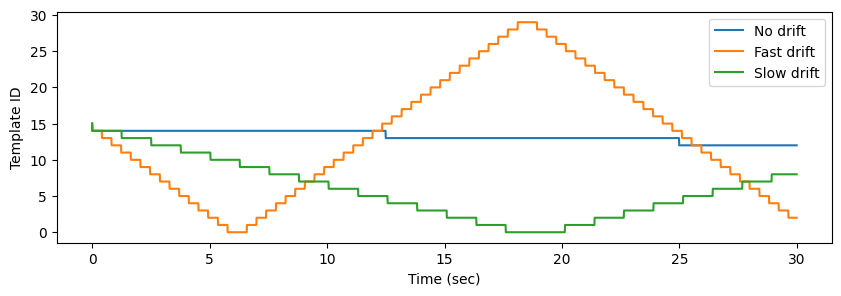

In [9]:
recording_path_list = [
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_toy'),
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_onlydrift_fast'),
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_onlydrift_slow'),
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_drift')
]

# drift_id
plt.figure(figsize=(10,3))
for i in range(3):
    recording_path = recording_path_list[i]
    print(recording_path)
    # load GT
    recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())

    rec = mr.load_recordings(recording_path / 'recordings.h5')
    plt.plot(np.arange(len(rec.drift_list[0]['drift_vector_idxs']))/100,rec.drift_list[0]['drift_vector_idxs'])
    
plt.legend(['No drift','Fast drift','Slow drift'])
plt.xlabel('Time (sec)')
plt.ylabel('Template ID')
plt.show()


studies\mouse_VISp_L5_128ch\recordings\recording_toy
studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_fast
studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_slow


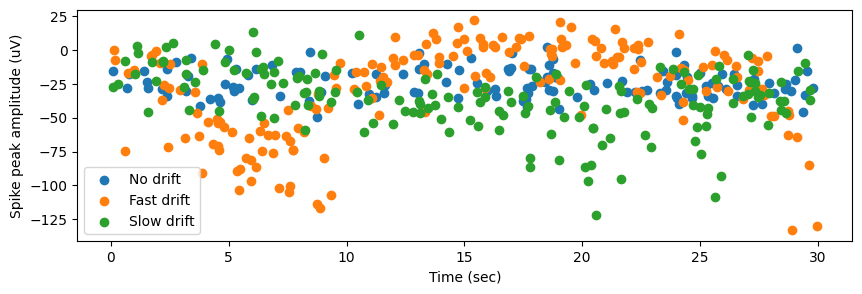

Done


In [16]:

# template max amp
id = 30
plt.figure(figsize=(10,3))
for i in range(3):
    recording_path = recording_path_list[i]
    print(recording_path)
    # load GT
    recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())

    rec = mr.load_recordings(recording_path / 'recordings.h5')
    x, y = get_spike_time_byUnitList(sorting_GT)[id],rec.recordings[get_spike_time_byUnitList(sorting_GT)[id],np.argmax(rec.voltage_peaks[id,:])]
    plt.scatter(x/recording.get_sampling_frequency(),y)

plt.legend(['No drift','Fast drift','Slow drift'])
plt.xlabel('Time (sec)')
plt.ylabel('Spike peak amplitude (uV)')
plt.show()

print('Done')